In [14]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import zipfile
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [15]:
# Step 2: Unzip Uploaded File (Make sure archive (1).zip is uploaded)
zip_path = "/content/archive (1).zip"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/")

In [16]:
# Step 3: Find and Load the CSV file
csv_path = None
for file in os.listdir("/content"):
    if file.endswith(".csv"):
        csv_path = os.path.join("/content", file)
        break

# Load the dataset
df = pd.read_csv(csv_path)
print("✅ Data Loaded Successfully!")
print(df.head())

✅ Data Loaded Successfully!
                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_reno

In [17]:
# Step 4: Basic Exploration
print("\nMissing Values:\n", df.isnull().sum())
print("\nDataset Info:\n")
print(df.info())


Missing Values:
 date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      

In [18]:
# Step 5: Drop rows with missing values (if any)
df.dropna(inplace=True)

In [19]:
# Step 6: Define Features and Target
# Try to auto-detect target column (commonly 'price' or 'MEDV')
possible_targets = ['price', 'Price', 'medv', 'MEDV']
target = None
for col in df.columns:
    if col.lower() in [p.lower() for p in possible_targets]:
        target = col
        break

if target is None:
    raise ValueError("Target column like 'price' or 'MEDV' not found!")

X = df.drop(columns=[target])
y = df[target]

In [20]:
# Identify and drop non-numeric columns (like datetime)
non_numeric_columns = X.select_dtypes(include=['object', 'datetime64']).columns
print("Dropping non-numeric columns:", list(non_numeric_columns))
X = X.drop(columns=non_numeric_columns)

# Now apply scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Dropping non-numeric columns: ['date', 'street', 'city', 'statezip', 'country']


In [21]:
# Step 7: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [22]:
# Step 8: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 9: Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
# Step 10: Evaluate the Model
y_pred = model.predict(X_test)

print("\n✅ Model Evaluation:")
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


✅ Model Evaluation:
R² Score: 0.03228385663277078
Mean Squared Error: 986921767056.1313


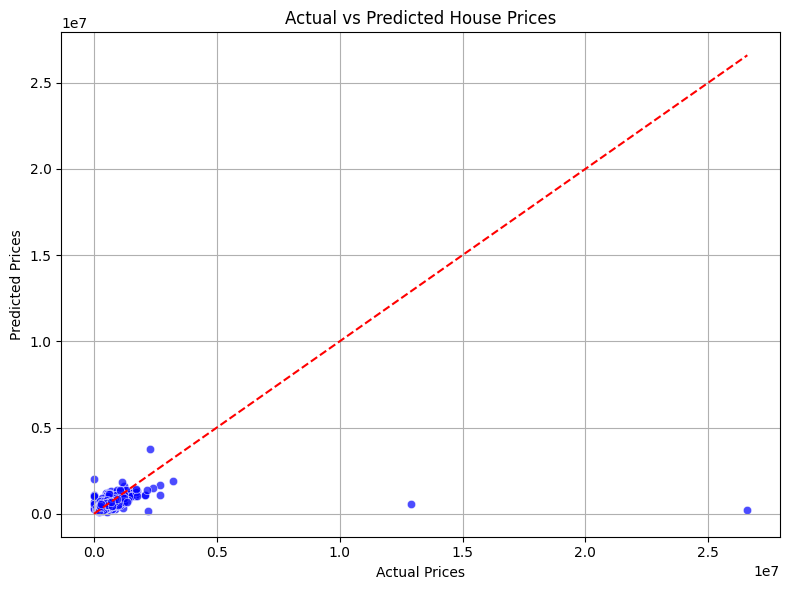

In [24]:
# Step 11: Visualize Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
# Step 12: Optional - Coefficients
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print("\nFeature Coefficients:")
print(coeff_df.sort_values(by='Coefficient', key=abs, ascending=False))


Feature Coefficients:
          Feature    Coefficient
2     sqft_living  137630.254184
8      sqft_above  120697.088700
10       yr_built  -76377.677379
9   sqft_basement   61415.300124
0        bedrooms  -58612.024508
4          floors   37581.760408
6            view   34834.371398
5      waterfront   32277.529439
1       bathrooms   28620.918763
7       condition   19864.740960
3        sqft_lot  -18457.455542
11   yr_renovated    8089.003726
